# **What's Cooking?**
## **M.S. in C.S. Graduate Project Report**
### *Akhil Saokar, Fall 2015*

#### This project will use the kaggle dataset where recipe ingredients are used to categorize the cuisine of a dish.  

#### *Part 1:* Data Interest

#### *Part 3:* Analysis
#### *Part 4:* Conclusions

## Part 2: Data Acquisition and Pre-Processing

### (a) *Read in the Training data file and display as a Panda DataFrame*

In [28]:
import pandas as pd
import numpy as np

training_load_data = pd.read_json('Data/train.json')
training_load_data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [2]:
testing_load_data = pd.read_json('Data/test.json')
testing_load_data.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [3]:
import re
import string
def removePunctuation(text):
    """Removes punctuation, changes to lower case, and strips leading and trailing spaces.

    Note:
        Only spaces, letters, and numbers will be retained.  Other characters should should be
        eliminated (e.g. it's becomes its).  Leading and trailing spaces should be removed after
        punctuation is removed.

    Args:
        text (str): A string.

    Returns:
        str: The cleaned up string.
    """
    no_bracket_string = re.sub(r'\([^)]*\)', '', text)
    return re.sub(r'[^A-z\s]','',no_bracket_string).lower().strip()

In [4]:
import nltk
from nltk.stem import WordNetLemmatizer
def stemWords(text):
    """Stems the word provided in the function

    Args:
        text (str): A list element.

    Returns:
        str: The stemmed string.
    """
    recipe = [WordNetLemmatizer().lemmatize(word) for word in text.split(" ")]
    return recipe

In [5]:
from nltk.corpus import stopwords # Import the stop word list

def removeStopWords(text):
    """Removes the stop words in the text provided in the function

    Args:
        text (str): A list element.

    Returns:
        str: The remaining string.
    """
    return [word for word in text.split(" ") if not word in stopwords.words("english")]

In [6]:
#nltk.download('wordnet')
#nltk.download('stopwords')

### (b) *Find the Cuisine counts in the training data*

In [7]:
from collections import Counter

#The following line of code removes the unicode ascii character from the JSON object
flattened_cuisines = [cuisine_string.encode('utf-8') for cuisine_string in training_load_data.cuisine]
all_cuisines_count = Counter(flattened_cuisines).most_common()
print all_cuisines_count

[('italian', 7838), ('mexican', 6438), ('southern_us', 4320), ('indian', 3003), ('chinese', 2673), ('french', 2646), ('cajun_creole', 1546), ('thai', 1539), ('japanese', 1423), ('greek', 1175), ('spanish', 989), ('korean', 830), ('vietnamese', 825), ('moroccan', 821), ('british', 804), ('filipino', 755), ('irish', 667), ('jamaican', 526), ('russian', 489), ('brazilian', 467)]


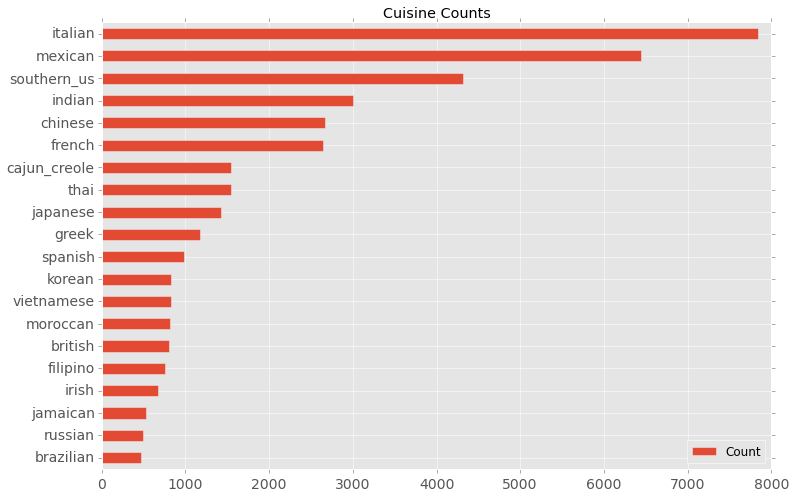

In [8]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.style.use('ggplot')
all_cuisines_dataframe = pd.DataFrame(all_cuisines_count, columns=['Cuisine', 'Count'])
cuisine_count_plot = all_cuisines_dataframe.sort(ascending=True, inplace=False).plot(kind='barh', title ="Cuisine Counts",figsize=(12,8), fontsize=14)
cuisine_count_plot.set_yticklabels(all_cuisines_dataframe.Cuisine)
cuisine_count_plot.invert_yaxis()
plt.show()

### (c) *To find the unique set and full list of ingredients per each cuisine, separately*

In [9]:
from nltk.stem import WordNetLemmatizer

training_cuisine_ingredient_corpus = training_load_data.groupby('cuisine')['ingredients'].sum().reset_index()

for k,v in training_cuisine_ingredient_corpus['cuisine'].iteritems():
    training_cuisine_ingredient_corpus['ingredients'][k] = map(removePunctuation,training_cuisine_ingredient_corpus['ingredients'][k])
    training_cuisine_ingredient_corpus['ingredients'][k] = map(stemWords,training_cuisine_ingredient_corpus['ingredients'][k])
    training_cuisine_ingredient_corpus['ingredients'][k] = list(' '.join(innerListElement) for innerListElement in training_cuisine_ingredient_corpus['ingredients'][k])
    training_cuisine_ingredient_corpus['ingredients'][k] = map(removeStopWords,training_cuisine_ingredient_corpus['ingredients'][k])
    training_cuisine_ingredient_corpus['ingredients'][k] = list(' '.join(innerListElement) for innerListElement in training_cuisine_ingredient_corpus['ingredients'][k])
    #print "Cuisine: ",v,"\n"\
        #"\nTotal ingredients:",len(training_cuisine_ingredient_corpus['ingredients'][k]),\
        #"\n\nProcessed list of ingredients used in all recipies (Removed Punctuations):",training_cuisine_ingredient_corpus['ingredients'][k],"\n"

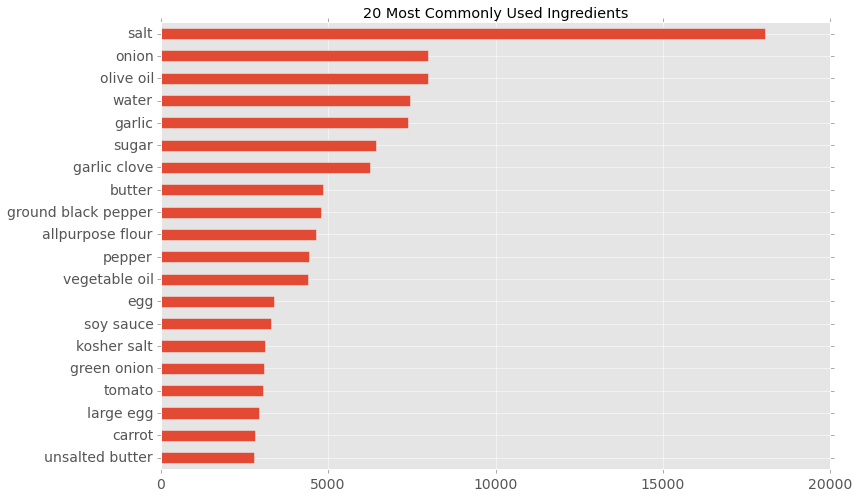

In [10]:
# Plot Ingredient Distribution of the training data set

%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt

plt.style.use('ggplot')
training_cuisine_all_ingredients = [Counter(recipe) for recipe in training_cuisine_ingredient_corpus['ingredients']]
training_cuisine_ingredient_distribution = sum(training_cuisine_all_ingredients, Counter())
ingredient_fig = pd.DataFrame(training_cuisine_ingredient_distribution, index=[0]).transpose()[0].sort(ascending=False, inplace=False)[:20].plot(kind='barh', title ="20 Most Commonly Used Ingredients",figsize=(12,8), fontsize=14)
ingredient_fig.invert_yaxis()
plt.show()

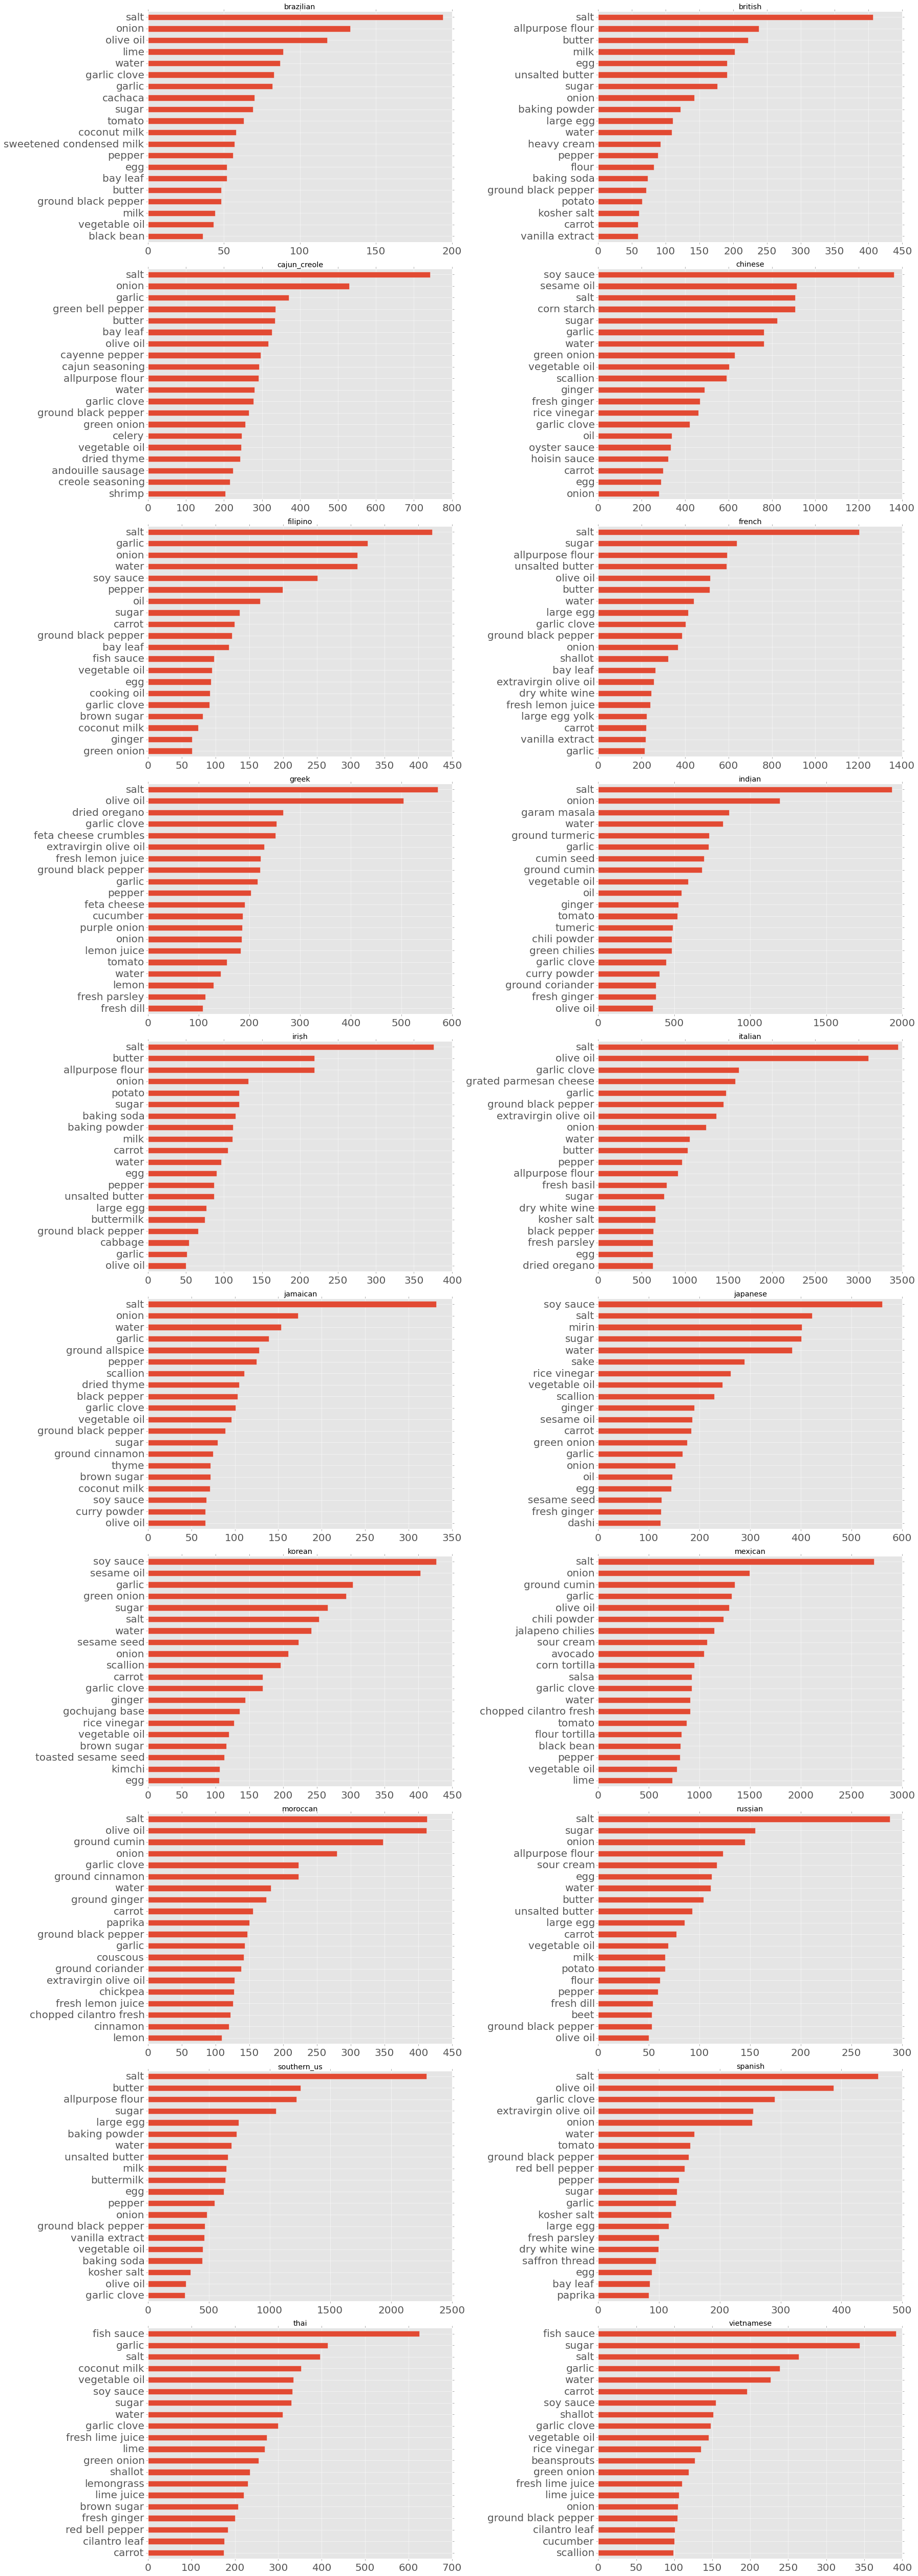

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(25,70))
for cuisine_count, ingredient_list in enumerate(list(training_cuisine_all_ingredients)):
    pd.DataFrame(ingredient_list, index=[0]).transpose()[0].sort(ascending=False, inplace=False)[:20]\
                     .plot(subplots=True, sharex=False, sharey=False, kind='barh',ax=axes[int(cuisine_count/2), int(cuisine_count%2)], fontsize=20)    
    axes[int(cuisine_count/2), int(cuisine_count%2)].invert_yaxis()
    axes[int(cuisine_count/2), int(cuisine_count%2)].set_title(training_cuisine_ingredient_corpus['cuisine'][cuisine_count])
fig.tight_layout()

### (d) *To find the unique set & full list ingredients in all cuisines combined (bag of ingredients)*

In [12]:
import itertools
training_unique_ingredients_corpus = set()
for k,v in training_cuisine_ingredient_corpus['cuisine'].iteritems():
    training_unique_ingredients_corpus.update(set(training_cuisine_ingredient_corpus['ingredients'][k]))
print 'Total unique ingredients in the bag: ',len(training_unique_ingredients_corpus)    
# print 'Set of unique ingredients used:',training_unique_ingredients_corpus

training_ingredients_corpus = []
for k,v in training_cuisine_ingredient_corpus['cuisine'].iteritems():
    training_ingredients_corpus.append(training_cuisine_ingredient_corpus['ingredients'][k])
training_ingredients_corpus = list(itertools.chain(*training_ingredients_corpus))
print 'Total ingredients in the bag: ',len(training_ingredients_corpus)    
#print 'Total ingredients in the bag: ',len(training_load_data['ingredients'].sum())    
# print 'List of ingredients used:',training_ingredients_corpus

Total unique ingredients in the bag:  6666
Total ingredients in the bag:  428275


### (e) *Creating the Bag-of-Ingredients Model*

In [13]:
%%time
training_dataframe = pd.DataFrame(training_load_data, columns=['cuisine', 'ingredients'])
training_ingredients_features = training_dataframe.ingredients

for recipe_id in range(0,len(training_dataframe)):
    training_ingredients_features.loc[recipe_id] = map(removePunctuation,training_ingredients_features.loc[recipe_id])
    training_ingredients_features.loc[recipe_id] = map(stemWords,training_ingredients_features.loc[recipe_id])
    training_ingredients_features.loc[recipe_id] = list(' '.join(innerListElement) for innerListElement in training_ingredients_features.loc[recipe_id])
    training_ingredients_features.loc[recipe_id] = map(removeStopWords,training_ingredients_features.loc[recipe_id])
    training_ingredients_features.loc[recipe_id] = list(' '.join(innerListElement) for innerListElement in training_ingredients_features.loc[recipe_id])
    #training_ingredients_features.loc[recipe_id] = ' '.join(training_ingredients_features.loc[recipe_id])
training_ingredients_features = [' '.join(item) for item in training_ingredients_features]
    #print training_ingredients_features[recipe_id],'\n'

CPU times: user 4min 26s, sys: 28 s, total: 4min 54s
Wall time: 5min 12s


In [14]:
%%time
testing_dataframe = pd.DataFrame(testing_load_data, columns=['id', 'ingredients'])
testing_ingredients_features = testing_dataframe.ingredients
for loop_id in range(0,len(testing_ingredients_features)):
    testing_ingredients_features.loc[loop_id] = map(removePunctuation,testing_ingredients_features.loc[loop_id])
    testing_ingredients_features.loc[loop_id] = map(stemWords,testing_ingredients_features.loc[loop_id])
    testing_ingredients_features.loc[loop_id] = list(' '.join(innerListElement) for innerListElement in testing_ingredients_features.loc[loop_id])
    testing_ingredients_features.loc[loop_id] = map(removeStopWords,testing_ingredients_features.loc[loop_id])
    testing_ingredients_features.loc[loop_id] = list(' '.join(innerListElement) for innerListElement in testing_ingredients_features.loc[loop_id])
testing_ingredients_features = [' '.join(item) for item in testing_ingredients_features]    
    #print testing_ingredients_features.loc[loop_id],'\n'

CPU times: user 3h 5min 48s, sys: 14 s, total: 3h 6min 2s
Wall time: 3h 6min 7s


//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
train_words = [' '.join(item) for item in training_load_data.ingredients]
test_words = [' '.join(item) for item in testing_load_data.ingredients]

In [16]:
print "Creating the bag of ingredients...\n"
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
training_vectorizer = CountVectorizer(analyzer = "word",   \
                             max_features = 1000) 

# fit_transform() does two functions: First, it fits the model 
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = training_vectorizer.fit_transform(training_ingredients_features)
# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features_array = train_data_features.toarray()
print "The bag of ingredients has been created!\n"

Creating the bag of ingredients...

The bag of ingredients has been created!



In [17]:
print "Creating the matrix of ingredients...\n"
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
training_vectorizer_tfidf = TfidfVectorizer(analyzer = "word",   \
                                            max_features = 1000) 

# fit_transform() does two functions: First, it fits the model 
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features_tfidf = training_vectorizer_tfidf.fit_transform(training_ingredients_features)
# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features_array_tfidf= train_data_features_tfidf.toarray()
print "The matrix of ingredients has been created!\n"

Creating the matrix of ingredients...

The matrix of ingredients has been created!



In [18]:
train_data_features

<39774x1000 sparse matrix of type '<type 'numpy.int64'>'
	with 732819 stored elements in Compressed Sparse Row format>

In [19]:
print "Creating the bag of ingredients for test dataset..."
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
testing_vectorizer = CountVectorizer(analyzer = "word",   \
                             max_features = 1000) 

# fit_transform() does two functions: First, it fits the model 
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
test_data_features = testing_vectorizer.fit_transform(testing_ingredients_features)
# Numpy arrays are easy to work with, so convert the result to an 
# array
test_data_features_array = test_data_features.toarray()
print "The bag of ingredients has been created for the test dataset!"

Creating the bag of ingredients for test dataset...
The bag of ingredients has been created for the test dataset!


In [20]:
print "Creating the matrix of ingredients..."
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
testing_vectorizer_tfidf = TfidfVectorizer(analyzer = "word",   \
                                            max_features = 1000) 

# fit_transform() does two functions: First, it fits the model 
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
test_data_features_tfidf = testing_vectorizer_tfidf.fit_transform(testing_ingredients_features)
# Numpy arrays are easy to work with, so convert the result to an 
# array
test_data_features_array_tfidf= test_data_features_tfidf.toarray()
print "The matrix of ingredients has been created!"

Creating the matrix of ingredients...
The matrix of ingredients has been created!


## Part 3: Analysis

In [23]:
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
#labels.fit(training_load_data.cuisine)
numeric_cuisine_targets = labels.fit_transform(training_load_data.cuisine)
#numeric_cuisine_targets = numeric_cuisine_targets.astype(str)
len(numeric_cuisine_targets)

39774

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

multinomial_naive_bayes_model = MultinomialNB()
multinomial_nb_params = {
    'alpha': np.linspace(0,1,21),
}

gradient_search_mnb = GridSearchCV(multinomial_naive_bayes_model, multinomial_nb_params, cv=10, scoring='accuracy', n_jobs=4)
gradient_search_mnb.fit(train_data_features_tfidf, training_load_data.cuisine)
sorted(gradient_search_mnb.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.71104, std: 0.00530, params: {'alpha': 1.0},
 mean: 0.71227, std: 0.00555, params: {'alpha': 0.95000000000000007},
 mean: 0.71346, std: 0.00557, params: {'alpha': 0.90000000000000002},
 mean: 0.71459, std: 0.00521, params: {'alpha': 0.85000000000000009},
 mean: 0.71600, std: 0.00529, params: {'alpha': 0.80000000000000004},
 mean: 0.71695, std: 0.00510, params: {'alpha': 0.75},
 mean: 0.71826, std: 0.00527, params: {'alpha': 0.70000000000000007},
 mean: 0.71856, std: 0.00391, params: {'alpha': 0.0},
 mean: 0.71944, std: 0.00528, params: {'alpha': 0.65000000000000002},
 mean: 0.72060, std: 0.00511, params: {'alpha': 0.60000000000000009},
 mean: 0.72145, std: 0.00505, params: {'alpha': 0.55000000000000004},
 mean: 0.72278, std: 0.00480, params: {'alpha': 0.5},
 mean: 0.72437, std: 0.00480, params: {'alpha': 0.45000000000000001},
 mean: 0.72540, std: 0.00498, params: {'alpha': 0.40000000000000002},
 mean: 0.72598, std: 0.00491, params: {'alpha': 0.35000000000000003},
 mean: 0.7271

In [52]:
from sklearn.naive_bayes import MultinomialNB
multinomial_naive_bayes_model = MultinomialNB(alpha=0.1)
multinomial_naive_bayes_model.fit(train_data_features_tfidf,training_load_data.cuisine)
mnb_predicted_labels = multinomial_naive_bayes_model.predict(test_data_features_tfidf)

In [53]:
mnb_predicted_labels

array([u'southern_us', u'southern_us', u'french', ..., u'italian',
       u'filipino', u'southern_us'], 
      dtype='<U12')

In [54]:
output = pd.DataFrame(data={"id":testing_load_data.id, "cuisine":mnb_predicted_labels})
output.to_csv("mnb_submission.csv", index=False, header=True, columns=["id","cuisine"])

In [22]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.grid_search import GridSearchCV

bernoulli_naive_bayes_model = BernoulliNB()
bernoulli_nb_params = {
    'alpha': np.linspace(0,1,21),
}

gradient_search_bnb = GridSearchCV(bernoulli_naive_bayes_model, bernoulli_nb_params, cv=10, scoring='accuracy', n_jobs=4)
gradient_search_bnb.fit(train_data_features_tfidf, training_load_data.cuisine)
sorted(gradient_search_bnb.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.69178, std: 0.00578, params: {'alpha': 0.0},
 mean: 0.70486, std: 0.00662, params: {'alpha': 0.5},
 mean: 0.70513, std: 0.00630, params: {'alpha': 0.55000000000000004},
 mean: 0.70516, std: 0.00660, params: {'alpha': 0.45000000000000001},
 mean: 0.70516, std: 0.00616, params: {'alpha': 0.65000000000000002},
 mean: 0.70523, std: 0.00600, params: {'alpha': 0.60000000000000009},
 mean: 0.70541, std: 0.00601, params: {'alpha': 0.70000000000000007},
 mean: 0.70549, std: 0.00634, params: {'alpha': 0.40000000000000002},
 mean: 0.70551, std: 0.00632, params: {'alpha': 0.85000000000000009},
 mean: 0.70559, std: 0.00599, params: {'alpha': 0.80000000000000004},
 mean: 0.70561, std: 0.00632, params: {'alpha': 0.75},
 mean: 0.70566, std: 0.00688, params: {'alpha': 0.25},
 mean: 0.70569, std: 0.00661, params: {'alpha': 0.30000000000000004},
 mean: 0.70569, std: 0.00570, params: {'alpha': 0.95000000000000007},
 mean: 0.70569, std: 0.00595, params: {'alpha': 1.0},
 mean: 0.70579, std: 0.00665

In [38]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_naive_bayes_model = BernoulliNB(alpha=0.6)
bernoulli_naive_bayes_model.fit(train_data_features,numeric_cuisine_targets)
bnb_predicted_labels = bernoulli_naive_bayes_model.predict(test_data_features)

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
gaussian_naive_bayes_model = GaussianNB()
#gaussian_naive_bayes_model.fit(train_data_features_arraynumeric_cuisine_targets_cuisine_targetsric_cuisine_targets)
gnb_scores = cross_validation.cross_val_score(gaussian_naive_bayes_model, train_data_features_array_tfidf, training_load_data.cuisine, cv=5)
#gradient_search_bnb.fit(train_data_features, numeric_cuisine_targets)
#sorted(gradient_search_bnb.grid_scores_, key=lambda x: x.mean_validation_score)
gnb_scores

array([ 0.2499372 ,  0.25458658,  0.24949723,  0.24349138,  0.25028313])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV

np.random.seed(123)
ab_params = {
    'n_estimators': [500],#range(200,1000,200), 
    'learning_rate': [0.4],#np.linspace(0.3,0.7,5),
}

adaboost_model = AdaBoostClassifier()
gradient_search_adaboost = GridSearchCV(adaboost_model, ab_params, cv=10, scoring='accuracy', n_jobs=4)
gradient_search_adaboost.fit(train_data_features_array, training_load_data.cuisine)
sorted(gradient_search_adaboost.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.65037, std: 0.01526, params: {'n_estimators': 500, 'learning_rate': 0.4}]

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from time import time

## Random Forest Classification

random_forest_model = RandomForestClassifier()
rf_params = {
    'n_estimators': range(100,1500,200), 
}
# Recored the time it takes to perform the search
start = time()
#random_forest.fit(train_data_features_array, numeric_cuisine_targets)
gradient_search_rf = GridSearchCV(random_forest_model, rf_params, cv=10, scoring='accuracy', n_jobs=4)
gradient_search_rf.fit(train_data_features_array_tfidf, training_load_data.cuisine)
sorted(gradient_search_rf.grid_scores_, key=lambda x: x.mean_validation_score)
print("RandomForest Training finished in %.2f" % (time() - start))

# Basic Evaluation on Training Set
#start = time()
#rf_scores = cross_validation.cross_val_score(random_forest, train_data_features_array, numeric_cuisine_targets, cv=2)
#print("RandomForest Evaluation finished in %.2f" % (time() - start))

# Display Accuracy
#print("Accuracy: ", rf_scores.mean())


RandomForest Training finished in 7253.36


In [25]:
sorted(gradient_search_rf.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.75419, std: 0.00510, params: {'n_estimators': 100},
 mean: 0.75713, std: 0.00516, params: {'n_estimators': 300},
 mean: 0.75771, std: 0.00667, params: {'n_estimators': 1100},
 mean: 0.75776, std: 0.00642, params: {'n_estimators': 700},
 mean: 0.75816, std: 0.00605, params: {'n_estimators': 500},
 mean: 0.75856, std: 0.00647, params: {'n_estimators': 900},
 mean: 0.75884, std: 0.00655, params: {'n_estimators': 1300}]

In [27]:
best_random_forest_model = RandomForestClassifier(n_estimators=1300)
best_random_forest_model.fit(train_data_features_array_tfidf,training_load_data.cuisine)
rf_prediction_labels = best_random_forest_model.predict(test_data_features_array_tfidf)

In [29]:
rf_prediction_labels

array([u'southern_us', u'french', u'thai', ..., u'cajun_creole',
       u'southern_us', u'mexican'], dtype=object)

In [30]:
output = pd.DataFrame(data={"id":testing_load_data.id, "cuisine":rf_prediction_labels})
output.to_csv("rf_submission.csv", index=False, header=True, columns=["id","cuisine"])

In [33]:
from sklearn.linear_model import Ridge

ridge_regression_model = Ridge(alpha=0.7)

ridge_regression_model.fit(train_data_features,numeric_cuisine_targets)
ridge_regression_model.score(train_data_features,numeric_cuisine_targets)

#ridge_regression_params = {
#    'alpha': np.linspace(0.1,0.7,2),
#}

#gradient_search_ridge_regression = GridSearchCV(ridge_regression_model, ridge_regression_params, cv=10, scoring='accuracy', n_jobs=4)
#gradient_search_ridge_regression.fit(train_data_features, training_load_data.cuisine)
#sorted(gradient_search_ridge_regression.grid_scores_, key=lambda x: x.mean_validation_score)

0.45535253483004423

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import cross_validation

kNearest_neighbors_model = KNeighborsRegressor(n_neighbors=5,p=1)
#kNearest_neighbors_params = {
#    'n_neighbors': [5],
#    'p': [1],#2],
#}
scores = cross_validation.cross_val_score(kNearest_neighbors_model, train_data_features, numeric_cuisine_targets, cv=5)
#gradient_search_kNearest_neighbors = GridSearchCV(kNearest_neighbors_model, kNearest_neighbors_params, cv=10, scoring='accuracy', n_jobs=4)
#gradient_search_kNearest_neighbors.fit(, numeric_cuisine_targets)
#sorted(gradient_search_kNearest_neighbors.grid_scores_, key=lambda x: x.mean_validation_score)
scores

array([ 0.3507075 ,  0.35200866,  0.35919901,  0.33344803,  0.37489018])

In [ ]:
scores.mean()

In [38]:
from sklearn.svm import SVR

svr_model = SVR(C=0.1,kernel='rbf')

svr_scores = cross_validation.cross_val_score(svr_model, train_data_features, numeric_cuisine_targets, cv=5)
#svr_params = {
#    'C': [0.1],
#    'kernel': ['rbf'],#'distance'],
#}

#gradient_search_svr = GridSearchCV(svr_model, svr_params, cv=10, scoring='accuracy', n_jobs=4)
#gradient_search_svr.fit(train_data_features, numeric_cuisine_targets)
#sorted(gradient_search_svr.grid_scores_, key=lambda x: x.mean_validation_score)
svr_scores.mean()

0.042503765449614407